# HW2 -
* ## Emily Bederov - 215025255 & Shira Lavi - 216006395

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split 

# Assuming reg_tree_model is already trained and X_test, y_test are defined
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
#Concatenating = pd.concat([df,df_test]).drop(["survived"], axis=1)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/EmilyBederov/Titanic-HW2/main/train.parquet')
df

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket
0,-1,C,-1,Unknown,0,15.2458,Unknown,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,2661
1,12,C,-1,Unknown,0,11.2417,Unknown,"Nicola-Yarred, Master. Elias",0,2,0,1,1,2651
2,18,Unknown,-1,Unknown,2,13.0000,"Kontiolahti, Finland / Detroit, MI","Hiltunen, Miss. Marta",1,1,1,1,0,250650
3,37,Unknown,-1,Unknown,2,9.5875,Unknown,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,4135
4,41,Unknown,-1,Unknown,2,39.6875,Unknown,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,3101295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,50,13,-1,Unknown,2,10.5000,"London, England / Marietta, Ohio and Milwaukee...","Ridsdale, Miss. Lucy",0,1,1,0,1,W./C. 14258
1043,4,2,-1,Unknown,2,22.0250,Unknown,"Kink-Heilmann, Miss. Luise Gretchen",2,2,1,0,1,315153
1044,32,Unknown,-1,Unknown,2,10.5000,"St Ives, Cornwall / Houghton, MI","Jenkin, Mr. Stephen Curnow",0,1,0,0,0,C.A. 33111
1045,21,Unknown,-1,Unknown,2,11.5000,"Penzance, Cornwall / Akron, OH","Cotterill, Mr. Henry 'Harry'",0,1,0,0,0,29107


We can see that for the name and the sex:
* miss-0, master-1
* women - 0, men - 1

In [5]:
df_test = pd.read_csv('https://raw.githubusercontent.com/EmilyBederov/Titanic-HW2/main/test.parquet')
df_test.head()

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket
0,64,Unknown,263,Unknown,2,26.0000,"Isle of Wight, England","Nicholson, Mr. Arthur Ernest",0,0,0,0,0,693
1,48,14,-1,Unknown,2,36.7500,"St Ives, Cornwall / Hancock, MI","Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",2,1,1,0,1,C.A. 33112
2,35,Unknown,-1,Unknown,1,12.3500,Unknown,"Keane, Mr. Daniel",0,1,0,0,0,233734
3,19,Unknown,-1,C23 C25 C27,2,263.0000,"Winnipeg, MB","Fortune, Mr. Charles Alexander",2,0,0,3,0,19950
4,4,15,-1,Unknown,2,11.1333,Unknown,"Johnson, Master. Harold Theodor",1,2,0,1,1,347742


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1047 non-null   int64  
 1   boat       1047 non-null   object 
 2   body       1047 non-null   int64  
 3   cabin      1047 non-null   object 
 4   embarked   1047 non-null   int64  
 5   fare       1047 non-null   float64
 6   home.dest  1047 non-null   object 
 7   name       1047 non-null   object 
 8   parch      1047 non-null   int64  
 9   pclass     1047 non-null   int64  
 10  sex        1047 non-null   int64  
 11  sibsp      1047 non-null   int64  
 12  survived   1047 non-null   int64  
 13  ticket     1047 non-null   object 
 14  Title      1047 non-null   int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 122.8+ KB


In [16]:
df.describe()

,age,body,embarked,fare,parch,pclass,sex,sibsp,survived,Title
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,27.772684,13.319962,1.512894,31.651491,0.366762,1.303725,0.353391,0.511939,0.382999,1.729704
std,14.076678,54.048716,0.806034,47.499113,0.814052,0.832775,0.478251,1.071801,0.486350,1.026655
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,-1.000000,1.000000,7.895800,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,25.000000,-1.000000,2.000000,14.400000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
75%,35.000000,-1.000000,2.000000,30.500000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000
max,80.000000,328.000000,3.000000,512.329200,9.000000,2.000000,1.000000,8.000000,1.000000,5.000000


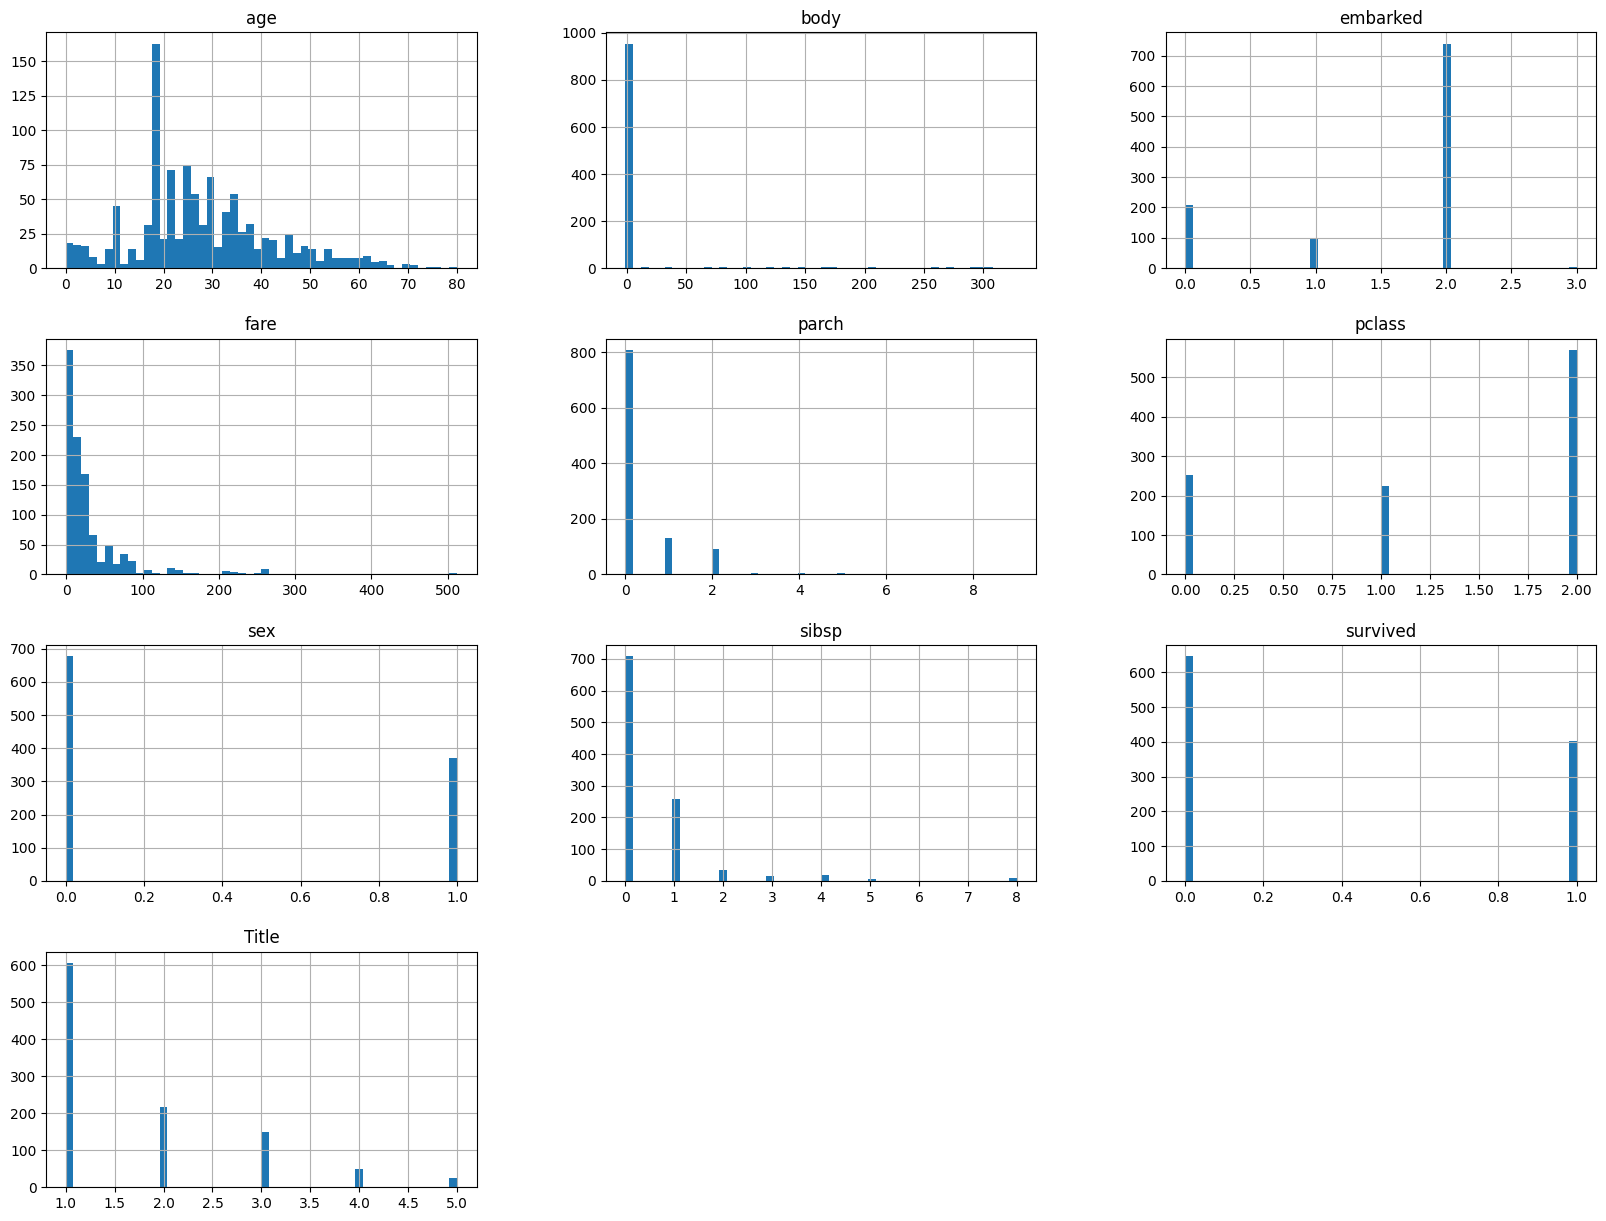

In [17]:
_ = df.hist(bins=50, figsize=(20,15))

### Preprocessing:
* Handaling missing values
* Encoding needed data
* Binning features
* Combinning features
* Removing Irrelavent features

In [18]:
# missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

age          0
boat         0
body         0
cabin        0
embarked     0
fare         0
home.dest    0
name         0
parch        0
pclass       0
sex          0
sibsp        0
survived     0
ticket       0
Title        0
dtype: int64


We saw missing values in our dataset -> we will make further analysis:
* age
* boat
* body
* cabin

In [19]:
#starting with age
def check_negative_values(df):
    
    negative_values_count = (df['age'] < 0).sum()
    
    return {
        'negative_values_count': negative_values_count
    }
age_missing_values = check_negative_values(df)
print(f"Train Dataset - Age Column:\nNegative Values: {age_missing_values['negative_values_count']}")

Train Dataset - Age Column:
Negative Values: 0


In [20]:
### Seems like to many rows to delete, how ever the age is important for the learning so we don't want to replace it

In [21]:
# Extract titles from the name column
df["Title"] = df.name.str.extract("([A-Za-z]+)\.", expand=False)

# Converting categorical feature to numeric
title_mapping = {
    "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 5, "Mlle": 5, "Major": 5,
    "Col": 5, "Countess": 5, "Capt": 5, "Ms": 3, "Sir": 5, "Lady": 5, "Mme": 5, "Don": 5,
    "Dona": 5, "Jonkheer": 5
}
df['Title'] = df['Title'].map(title_mapping)

# Calculate mean Age for each combination of pclass, sex, and Title
mean_ages = df.groupby(['pclass', 'sex', 'Title'], as_index=False)['age'].mean().astype(int)

# Replace negative Age values using the mean Age from the groups
negative_ages = df[df['age'] < 0]

for index, row in negative_ages.iterrows():
    pclass = row['pclass']
    sex = row['sex']
    title = row['Title']
    mean_age = mean_ages[(mean_ages["pclass"] == pclass) & (mean_ages["sex"] == sex) & (mean_ages["Title"] == title)]['age']
    
    if not mean_age.empty:
        df.loc[index, 'age'] = mean_age.values[0]

# Verify there are no negative ages
negative_ages_after = df[df['age'] < 0]
negative_ages_after

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket,Title


In [22]:
Concatenating = pd.concat([df,df_test]).drop(["survived"], axis=1)
c = Concatenating.groupby(['pclass','sex', "parch"], as_index=False, sort=True)['age'].mean().astype(int)
c.head()

,pclass,sex,parch,age
0,0,0,0,39
1,0,0,1,44
2,0,0,2,20
3,0,0,3,61
4,0,0,4,64


In [23]:
df

,age,boat,body,cabin,embarked,fare,home.dest,name,parch,pclass,sex,sibsp,survived,ticket,Title
0,4,C,-1,Unknown,0,15.2458,Unknown,"Moubarek, Master. Halim Gonios ('William George')",1,2,0,1,1,2661,4
1,12,C,-1,Unknown,0,11.2417,Unknown,"Nicola-Yarred, Master. Elias",0,2,0,1,1,2651,4
2,18,Unknown,-1,Unknown,2,13.0000,"Kontiolahti, Finland / Detroit, MI","Hiltunen, Miss. Marta",1,1,1,1,0,250650,2
3,37,Unknown,-1,Unknown,2,9.5875,Unknown,"Laitinen, Miss. Kristina Sofia",0,2,1,0,0,4135,2
4,41,Unknown,-1,Unknown,2,39.6875,Unknown,"Panula, Mrs. Juha (Maria Emilia Ojala)",5,2,1,0,0,3101295,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,50,13,-1,Unknown,2,10.5000,"London, England / Marietta, Ohio and Milwaukee...","Ridsdale, Miss. Lucy",0,1,1,0,1,W./C. 14258,2
1043,4,2,-1,Unknown,2,22.0250,Unknown,"Kink-Heilmann, Miss. Luise Gretchen",2,2,1,0,1,315153,2
1044,32,Unknown,-1,Unknown,2,10.5000,"St Ives, Cornwall / Houghton, MI","Jenkin, Mr. Stephen Curnow",0,1,0,0,0,C.A. 33111,1
1045,21,Unknown,-1,Unknown,2,11.5000,"Penzance, Cornwall / Akron, OH","Cotterill, Mr. Henry 'Harry'",0,1,0,0,0,29107,1


In [24]:
df = df.drop(columns=['name','Title', 'ticket'], axis=1)

check for missing values other the NaN

In [25]:
def check_missing_values(df):
    # Replace 'Unknown' with NaN in 'boat', 'cabin', and 'home.dest' columns
    df['boat'] = df['boat'].replace('Unknown', np.nan)
    df['cabin'] = df['cabin'].replace('Unknown', np.nan)
    df['home.dest'] = df['home.dest'].replace('Unknown', np.nan)
    
    # Count the missing values in each column
    boat_missing = df['boat'].isnull().sum()
    cabin_missing = df['cabin'].isnull().sum()
    home_dest_missing = df['home.dest'].isnull().sum()

    return {
        'boat_missing_values_count': boat_missing,
        'cabin_missing_values_count': cabin_missing,
        'home_dest_missing_values_count': home_dest_missing
    }

# Assuming 'train_data' and 'test_data' are your DataFrame names
# Check missing values in the train dataset
train_missing_values = check_missing_values(df)
print(f"Train Dataset:\n'Boat' Missing Values: {train_missing_values['boat_missing_values_count']}\n'Cabin' Missing Values: {train_missing_values['cabin_missing_values_count']}\n'Home.dest' Missing Values: {train_missing_values['home_dest_missing_values_count']}")

# Check missing values in the test dataset
test_missing_values = check_missing_values(df_test)
print(f"Test Dataset:\n'Boat' Missing Values: {test_missing_values['boat_missing_values_count']}\n'Cabin' Missing Values: {test_missing_values['cabin_missing_values_count']}\n'Home.dest' Missing Values: {test_missing_values['home_dest_missing_values_count']}")

Train Dataset:
'Boat' Missing Values: 655
'Cabin' Missing Values: 820
'Home.dest' Missing Values: 443
Test Dataset:
'Boat' Missing Values: 168
'Cabin' Missing Values: 194
'Home.dest' Missing Values: 121


In 'home.dest' we have 443 missing values, it is not an important column becase the Titanic didnwt drop anyone so we will delete that column.
We will also delete 'cabin' because we have 820 missing values out of 1046 raws and that is to much
'boat' have 655 missing values out of 1046 which is alot' and also the data is dirty' including letters and numers, we will delete it too.

In [26]:
#if the cabin was good the fare was higher -> since most of it is missing well focus on the fair
df = df.drop(columns=['cabin'])
df_test = df_test.drop(columns=['cabin'])

#most of the data is missing
df = df.drop(columns=['boat'])
df_test = df_test.drop(columns=['boat'])

#the titanic never arrived anywhere so it doesnt matter where peaple got on it
df = df.drop(columns=['home.dest'])
df_test = df_test.drop(columns=['home.dest'])

In [27]:
#check if parch, pclass, sex, sibsp, survived or fare contain negative values.
def check_values(df, columns):
   
    results = {}
    for col in columns:
        negative_values_count = (df[col] < 0).sum()
        results[col] = {
            'negative_values_count': negative_values_count
        }
    return results

# List of columns to check
columns_to_check = ['parch', 'pclass', 'sex', 'sibsp', 'fare','survived', 'embarked']

# Check values in the train dataset
train_values_check = check_values(df, columns_to_check)
print("Train Dataset:")
for col, checks in train_values_check.items():
    print(f"Column: {col} - Negative Values: {checks['negative_values_count']}")

# Check values in the test dataset
test_values_check = check_values(df_test, columns_to_check)
print("\nTest Dataset:")
for col, checks in test_values_check.items():
    print(f"Column: {col} - Negative Values: {checks['negative_values_count']}")

Train Dataset:
Column: parch - Negative Values: 0
Column: pclass - Negative Values: 0
Column: sex - Negative Values: 0
Column: sibsp - Negative Values: 0
Column: fare - Negative Values: 1
Column: survived - Negative Values: 0
Column: embarked - Negative Values: 0

Test Dataset:
Column: parch - Negative Values: 0
Column: pclass - Negative Values: 0
Column: sex - Negative Values: 0
Column: sibsp - Negative Values: 0
Column: fare - Negative Values: 0
Column: survived - Negative Values: 0
Column: embarked - Negative Values: 0


In [28]:
#lets find the negative fare value and delete it, we wont replace it with anything, its only one value and we dont want it to cause any bias.
def remove_negative_fare(df):
    negative_fare_rows = df[df['fare'] < 0]
    df = df[df['fare'] >= 0]
    return df

# Remove negative fare values from both train and test datasets
df = remove_negative_fare(df)

In [29]:
# move on to missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

age         0
body        0
embarked    0
fare        0
parch       0
pclass      0
sex         0
sibsp       0
survived    0
dtype: int64


In [30]:
# Display unique values in the 'Body' column for the train dataset
unique_body_train = df_test['body'].unique()
print("Unique values in the 'Body' column of the train dataset:")
print(unique_body_train)

# Display unique values in the 'Body' column for the test dataset
unique_body_test = df['body'].unique()
print("\nUnique values in the 'Body' column of the test dataset:")
print(unique_body_test)

Unique values in the 'Body' column of the train dataset:
[263  -1 155 208 121 286 256  58 176 327 189  45 108 283  51 153  53 234
 230 307  62 187  37   7 309 285 122  47]

Unique values in the 'Body' column of the test dataset:
[ -1 201 175 314 143  67 287  61  43  98 328  16 298  96 292 101  97   9
 166 209  14  38   4 133 174 207 260  81 305 171  18 173  15 295 103  46
  19 124 284 131 156 232 206 110 294 135  50 258  17 148 293 190 322  89
 130  69 197  70  32 269  68 142 297 271  79 196 255 306 312  52 109 165
  75 304 169 249 259 120 119 149 181  35 236 188 172 299   1  80 275 147
 245 126  22  72]


In [31]:
print(f"\nnumber of not -1 varibles in body column: {(df['body']).nunique()-1}")
print(f"\nnumber of -1 varible in body column: {(df['body']==-1).sum()}")


number of not -1 varibles in body column: 93

number of -1 varible in body column: 953


In [32]:
# Check how many positive 'body' values correspond to survivors
positive_body = df[df['body'] > 0]
positive_body_survived_count = (positive_body['survived'] == 1).sum()
positive_body_not_survived_count = (positive_body['survived'] == 0).sum()

print(f"Number of survivors with positive 'body' values in train dataset: {positive_body_survived_count}")
print(f"Number of non-survivors with positive 'body' values in train dataset: {positive_body_not_survived_count}")

# Check how many negative 'body' values correspond to survivors
negative_body = df[df['body'] < 0]
negative_body_survived_count = (negative_body['survived'] == 1).sum()
negative_body_not_survived_count = (negative_body['survived'] == 0).sum()

print(f"Number of survivors with negative 'body' values in train dataset: {negative_body_survived_count}")
print(f"Number of non-survivors with negative 'body' values in train dataset: {negative_body_not_survived_count}")

Number of survivors with positive 'body' values in train dataset: 0
Number of non-survivors with positive 'body' values in train dataset: 93
Number of survivors with negative 'body' values in train dataset: 401
Number of non-survivors with negative 'body' values in train dataset: 552


In one hand it appears that all the body positive features didnt survive, but its only 10% of data, its sounds problamatic to make assumptions by that info, we will drop it

In [33]:
df = df.drop(columns=['body'])
df_test = df_test.drop(columns=['body'])

In [34]:
# Check for missing values in the 'embarked' column
unique_embarked_values = df['embarked'].unique()
unique_embarked_values

array([0, 2, 1, 3])

In [35]:
(df['embarked']==3).sum()

2

In [36]:
#embarked consist only 0,1,2 therefore we will remove the missing data
def remove(df):
    negative_fare_rows = df[df['embarked'] == 3]
    df = df[df['embarked'] != 3]
    return df

# Remove negative fare values from both train and test datasets
df = remove(df)

maybe putting family members together as one columns will simplify our model(?)

In [37]:
df

,age,embarked,fare,parch,pclass,sex,sibsp,survived
0,4,0,15.2458,1,2,0,1,1
1,12,0,11.2417,0,2,0,1,1
2,18,2,13.0000,1,1,1,1,0
3,37,2,9.5875,0,2,1,0,0
4,41,2,39.6875,5,2,1,0,0
...,...,...,...,...,...,...,...,...
1042,50,2,10.5000,0,1,1,0,1
1043,4,2,22.0250,2,2,1,0,1
1044,32,2,10.5000,0,1,0,0,0
1045,21,2,11.5000,0,1,0,0,0


detecting outliers

In [38]:
def detect_outliers_iqr(df):
    outlier_dict = {}  # To store outliers and their counts for each column
    for column in df.columns:  
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR

        # Identifying outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        if not outliers.empty:
            outlier_dict[column] = {'outliers': outliers.tolist(), 'count': len(outliers)}
        else:
            outlier_dict[column] = {'outliers': "No outliers detected", 'count': 0}

    return outlier_dict

outliers_dict = detect_outliers_iqr(df)

print("Number of Outliers from IQR method:")
for column, info in outliers_dict.items():
    print(f"{column}: {info['count']}")

for column, info in outliers_dict.items():
        print(f"Outliers from IQR method for {column}: {info}")

Number of Outliers from IQR method:
age: 33
embarked: 0
fare: 129
parch: 238
pclass: 0
sex: 0
sibsp: 47
survived: 0
Outliers from IQR method for age: {'outliers': [63, 60, 64, 62, 67, 74, 60, 63, 60, 70, 61, 80, 76, 60, 63, 64, 62, 64, 62, 60, 70, 61, 61, 66, 70, 71, 63, 65, 65, 60, 61, 61, 71], 'count': 33}
Outliers from IQR method for embarked: {'outliers': 'No outliers detected', 'count': 0}
Outliers from IQR method for fare: {'outliers': [211.5, 78.2667, 135.6333, 110.8833, 89.1042, 65.0, 81.8583, 69.55, 76.7292, 86.5, 79.2, 79.65, 135.6333, 133.65, 211.3375, 69.3, 75.25, 77.2875, 90.0, 151.55, 211.3375, 76.2917, 135.6333, 110.8833, 83.1583, 263.0, 151.55, 73.5, 69.55, 86.5, 79.2, 90.0, 65.0, 221.7792, 75.2417, 78.2667, 69.55, 227.525, 221.7792, 90.0, 69.55, 83.475, 211.3375, 79.2, 512.3292, 136.7792, 82.1708, 221.7792, 247.5208, 90.0, 89.1042, 91.0792, 73.5, 247.5208, 71.2833, 69.55, 73.5, 77.9583, 120.0, 69.55, 81.8583, 262.375, 76.7292, 82.1708, 211.5, 263.0, 227.525, 83.1583, 1

* body - the positive values of body are only 10% therefore they were identified as outliers, but after other investigations we think maybe we should keep them and train the model with & without them
* sibsp, parch -  It makes sense that most of the people came to the Titanic with about 2 siblings but we don't think it is impossible that someone came with 8 siblings & spouse, so wo wont clean it, same for parch.
* fare - 200 dollar ticket seems reasonbale, we'll delete tickets above 400$.

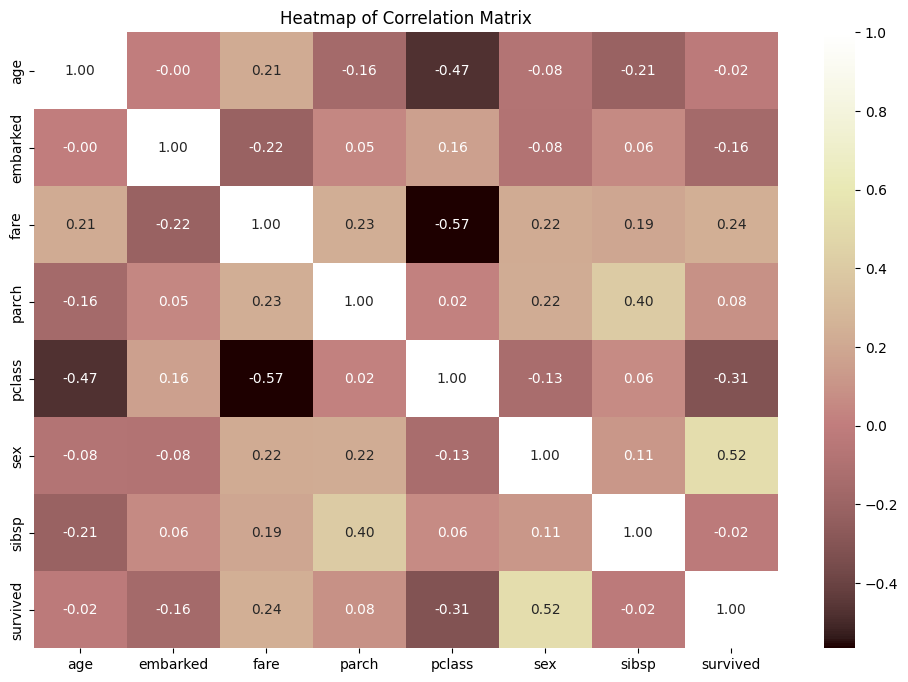

In [39]:
# Creating a correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='pink', cbar=True, fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

### moving on to some vizualizations, and trainings

ages check

Higher Precision and Recall for Non-Survivors: The model with median-replaced age shows significantly higher precision and recall for predicting non-survivors compared to the binned model. This suggests better performance in identifying passengers who did not survive.
* Improved F1-Score: The F1-score, which balances precision and recall, is also higher in the median-replaced model for both classes, indicating a better overall balance between precision and recall.
* Increased Overall Accuracy and Weighted Average F1-Score: The median-replaced model not only performs better on individual metrics but also shows higher overall accuracy and a better weighted average F1-score.
* We will choose to replace the ages with median

FareCategory
1    466
0    381
2    184
Name: count, dtype: int64


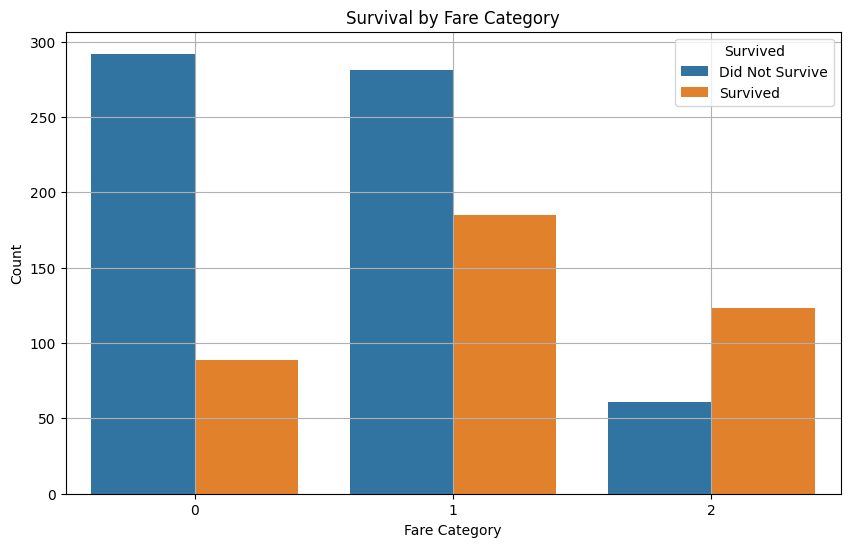

In [40]:
fare_bins = [0, 10, 50, np.inf]
fare_labels = ['0', '1', '2']

# Create a new column 'FareCategory' in the dataset
df['FareCategory'] = pd.cut(df['fare'], bins=fare_bins, labels=fare_labels)
df_test['FareCategory'] = pd.cut(df['fare'], bins=fare_bins, labels=fare_labels)

# Display the count of each category
fare_category_counts = df['FareCategory'].value_counts()
print(fare_category_counts)

# Additional plot to see Fare Category against Survival
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FareCategory', hue='survived', order=fare_labels)
plt.xlabel('Fare Category')
plt.ylabel('Count')
plt.title('Survival by Fare Category')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.grid(True)
plt.show()

In [41]:
# Prepare data
X_binned = df.drop(['survived', 'fare'], axis=1)
X_continuous = df.drop(['survived', 'FareCategory'], axis=1)
y = df['survived']

# Split data
X_train_b, X_test_b, y_train, y_test = train_test_split(X_binned, y, test_size=0.3, random_state=42)
X_train_c, X_test_c, _, _ = train_test_split(X_continuous, y, test_size=0.3, random_state=42)

# Train model
model_b = RandomForestClassifier(random_state=42)
model_c = RandomForestClassifier(random_state=42)
model_b.fit(X_train_b, y_train)
model_c.fit(X_train_c, y_train)

# Evaluate model
predictions_b = model_b.predict(X_test_b)
predictions_c = model_c.predict(X_test_c)
print("Binned Fare:")
print(classification_report(y_test, predictions_b))
print("Continuous Fare:")
print(classification_report(y_test, predictions_c))

Binned Fare:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       202
           1       0.66      0.71      0.68       112

    accuracy                           0.77       314
   macro avg       0.75      0.75      0.75       314
weighted avg       0.77      0.77      0.77       314

Continuous Fare:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       202
           1       0.68      0.71      0.70       112

    accuracy                           0.78       314
   macro avg       0.76      0.77      0.76       314
weighted avg       0.78      0.78      0.78       314



* The continous fare shows Higher Performance: The model using continuous fare data shows improved performance across almost all metrics, including precision, recall, and F1-score for both classes. Notably, the accuracy and weighted average F1-score are also higher compared to the binned model.
* Interpretation: The better performance of the continuous model suggests that the granularity and detail captured by the continuous fare values provide more useful information for the model than the binned categories. This can be particularly important in a dataset like the Titanic, where fare might correlate with other variables like class, cabin location, and access to lifeboats, which are crucial for survival.
* We will keep fare continous

In [42]:
df = df.drop(columns=['FareCategory'])

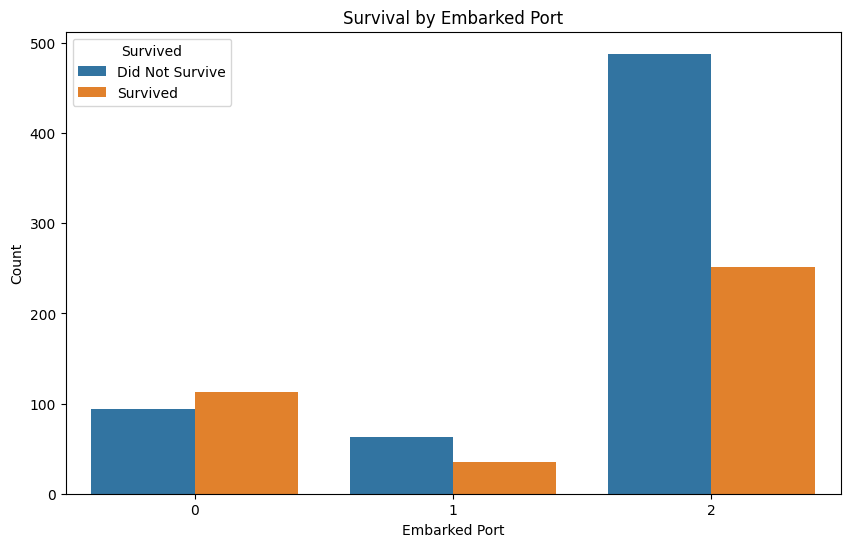

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='embarked', hue='survived')
plt.title('Survival by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

In [44]:
df

,age,embarked,fare,parch,pclass,sex,sibsp,survived
0,4,0,15.2458,1,2,0,1,1
1,12,0,11.2417,0,2,0,1,1
2,18,2,13.0000,1,1,1,1,0
3,37,2,9.5875,0,2,1,0,0
4,41,2,39.6875,5,2,1,0,0
...,...,...,...,...,...,...,...,...
1042,50,2,10.5000,0,1,1,0,1
1043,4,2,22.0250,2,2,1,0,1
1044,32,2,10.5000,0,1,0,0,0
1045,21,2,11.5000,0,1,0,0,0


# Training the model

In [45]:
X = df.drop(columns=['survived'])
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression

In [46]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       134
           1       0.69      0.75      0.72        75

    accuracy                           0.79       209
   macro avg       0.77      0.78      0.78       209
weighted avg       0.79      0.79      0.79       209



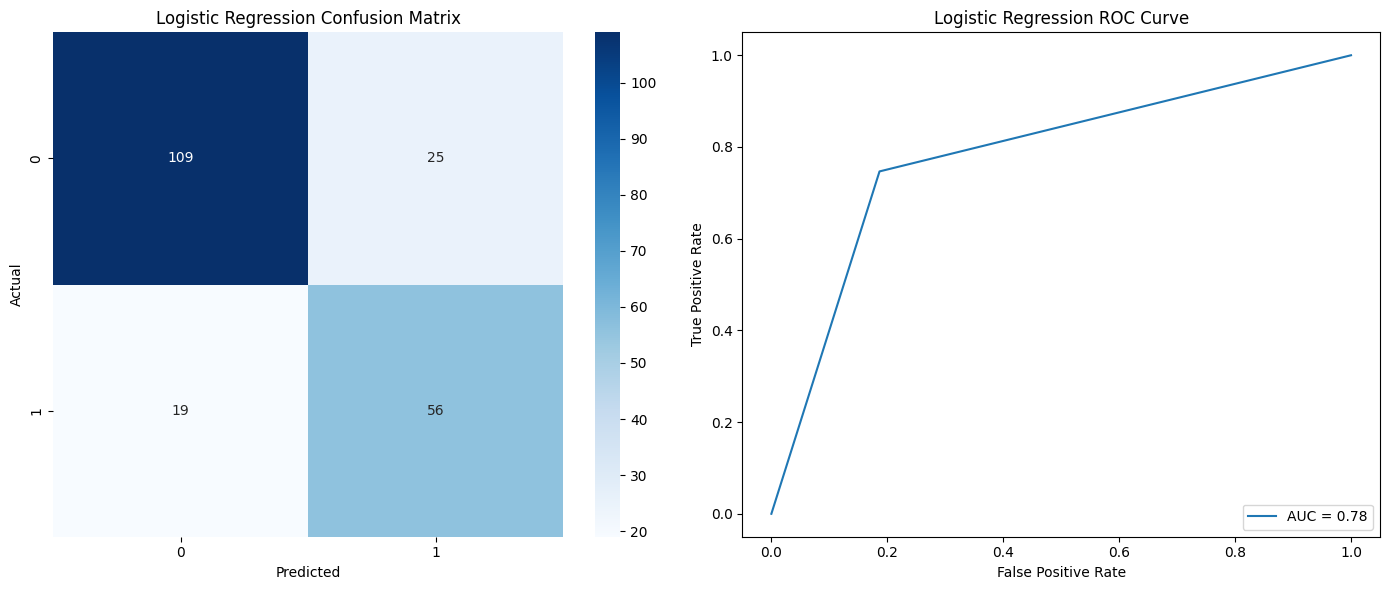

In [47]:
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

ax[1].plot(fpr, tpr, label=f"AUC = {auc:.2f}")
ax[1].set_title('Logistic Regression ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# decision tree

In [48]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       134
           1       0.66      0.68      0.67        75

    accuracy                           0.76       209
   macro avg       0.74      0.74      0.74       209
weighted avg       0.76      0.76      0.76       209



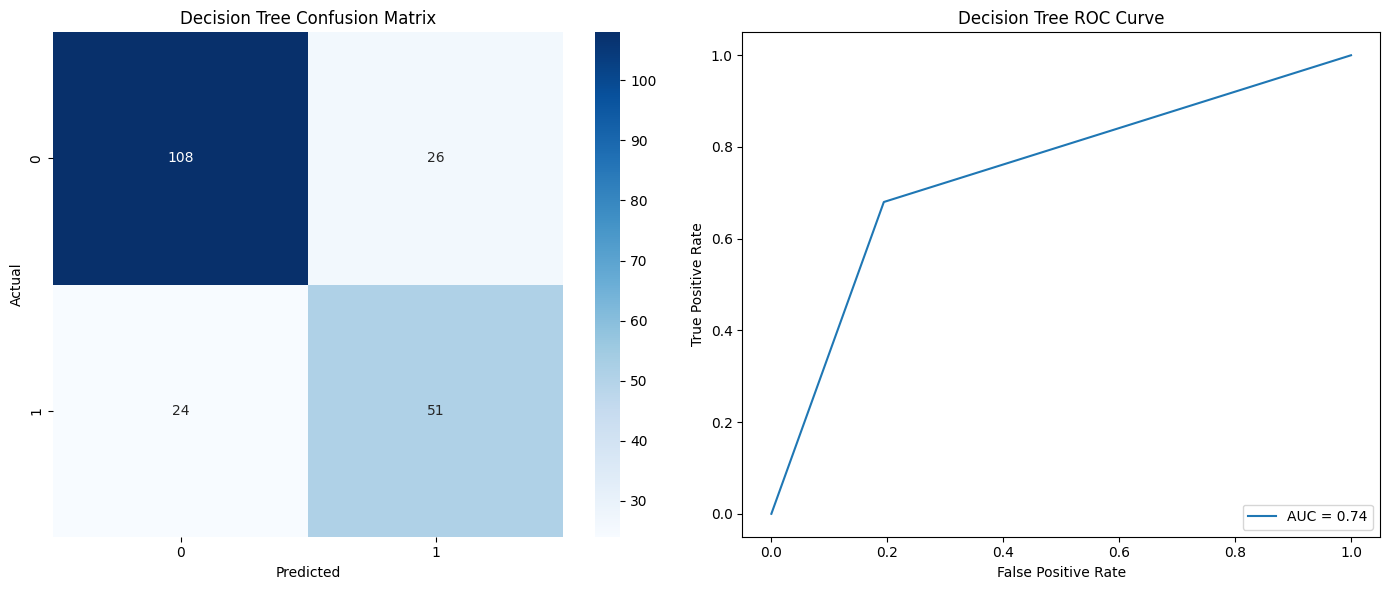

In [49]:
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Decision Tree Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

ax[1].plot(fpr, tpr, label=f"AUC = {auc:.2f}")
ax[1].set_title('Decision Tree ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# random forest

In [50]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       134
           1       0.68      0.73      0.71        75

    accuracy                           0.78       209
   macro avg       0.76      0.77      0.76       209
weighted avg       0.78      0.78      0.78       209



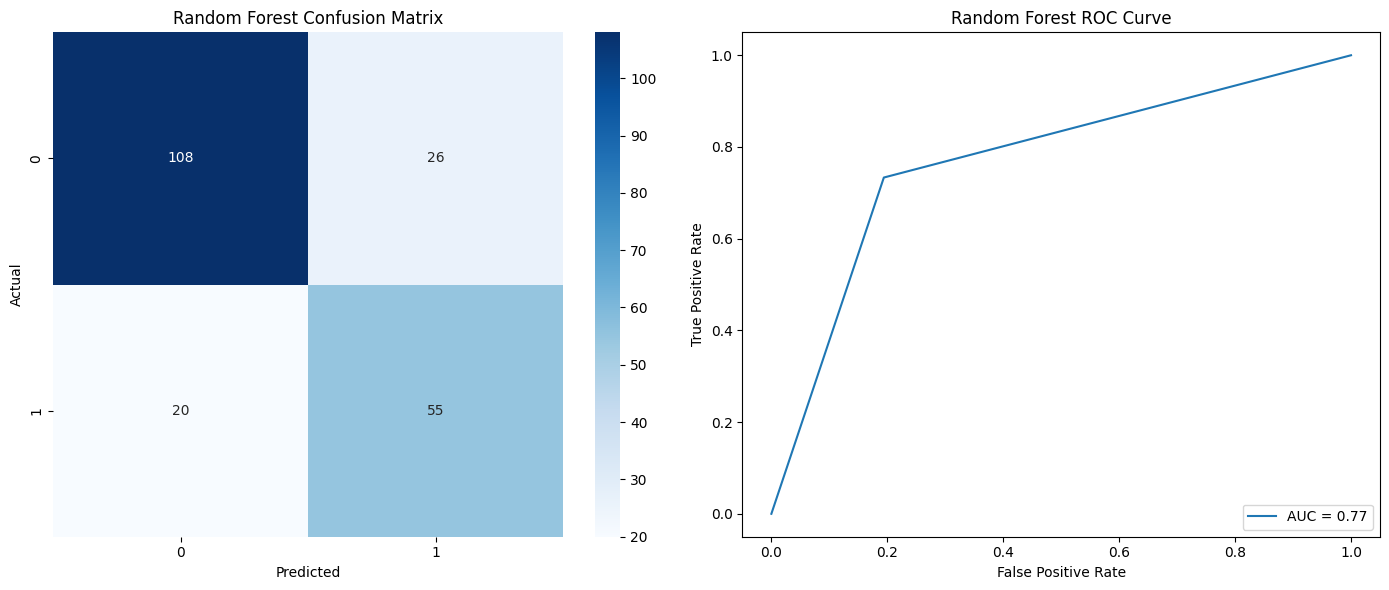

In [51]:
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

ax[1].plot(fpr, tpr, label=f"AUC = {auc:.2f}")
ax[1].set_title('Random Forest ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# gradient boosting

In [52]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       134
           1       0.77      0.68      0.72        75

    accuracy                           0.81       209
   macro avg       0.80      0.78      0.79       209
weighted avg       0.81      0.81      0.81       209



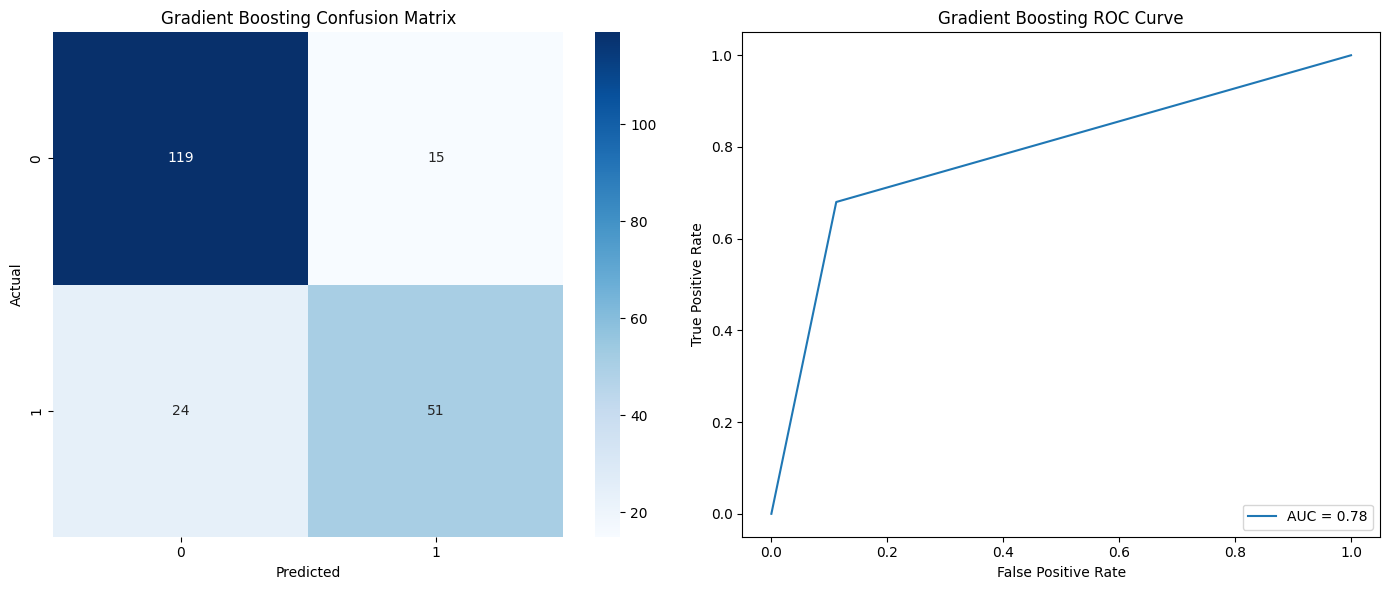

In [53]:
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Gradient Boosting Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

ax[1].plot(fpr, tpr, label=f"AUC = {auc:.2f}")
ax[1].set_title('Gradient Boosting ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# bagging model

In [54]:
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)

print("Bagging Classification Report:")
print(classification_report(y_test, y_pred))

Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       134
           1       0.69      0.75      0.72        75

    accuracy                           0.79       209
   macro avg       0.77      0.78      0.78       209
weighted avg       0.79      0.79      0.79       209



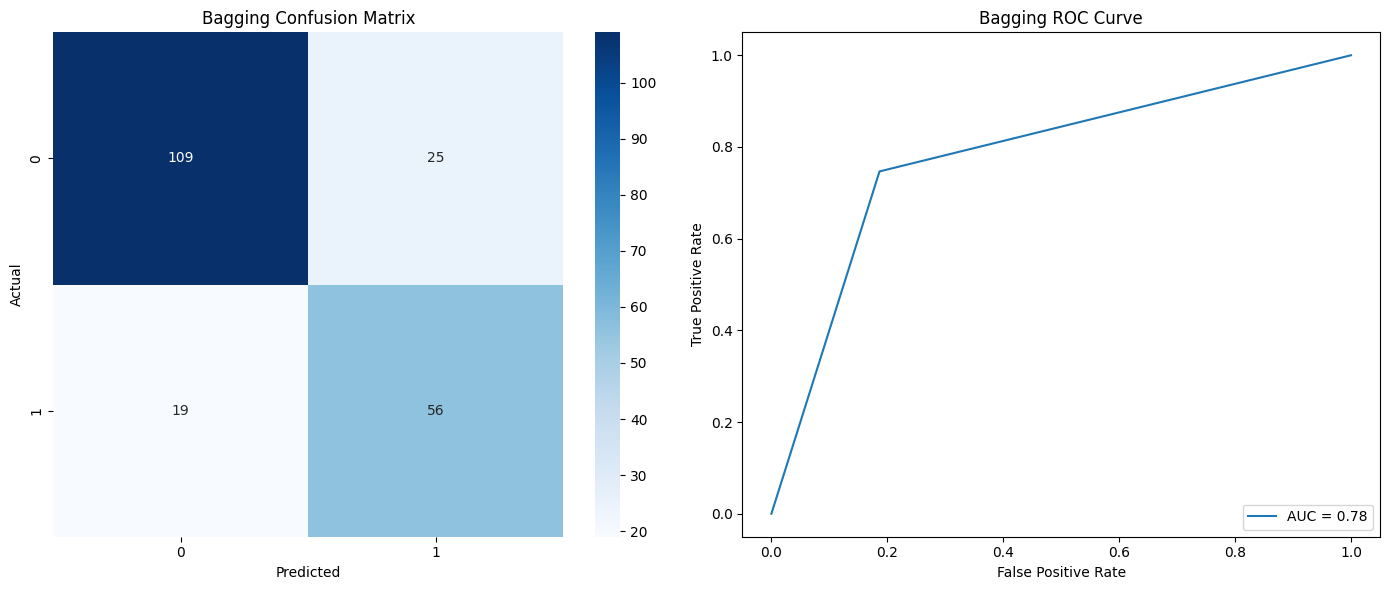

In [55]:
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Bagging Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

ax[1].plot(fpr, tpr, label=f"AUC = {auc:.2f}")
ax[1].set_title('Bagging ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

In [56]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


XG BOOST MODEL

In [57]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Initialize the XGBoost model without the deprecated parameter
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = xgb_model.predict(X_test)

# Print the classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       134
           1       0.67      0.67      0.67        75

    accuracy                           0.76       209
   macro avg       0.74      0.74      0.74       209
weighted avg       0.76      0.76      0.76       209



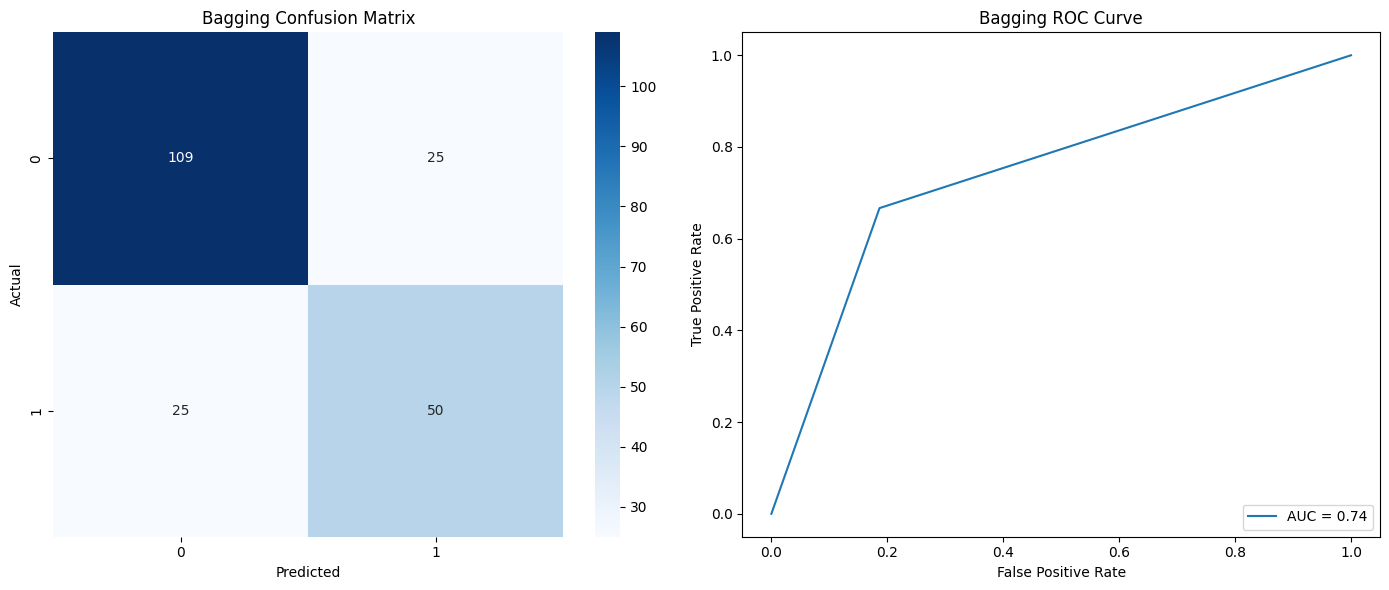

In [58]:
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Bagging Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

ax[1].plot(fpr, tpr, label=f"AUC = {auc:.2f}")
ax[1].set_title('Bagging ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Now moving on to cross validation

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    results[name] = np.mean(cv_scores)

# Print results
for name, score in results.items():
    print(f"{name}: Average accuracy = {score:.2f}")

# Determine the best model
best_model = max(results, key=results.get)
print(f"Best model: {best_model} with an average accuracy of {results[best_model]:.2f}")

Logistic Regression: Average accuracy = 0.78
Decision Tree: Average accuracy = 0.76
Random Forest: Average accuracy = 0.79
Bagging: Average accuracy = 0.77
Gradient Boosting: Average accuracy = 0.81
Best model: Gradient Boosting with an average accuracy of 0.81


In [60]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 8]
}

# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Reinitialize the classifier with the best parameters
gb.set_params(**best_params)
gb.fit(X_train, y_train)

# Predict and evaluate the model on the test set
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Updated Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Updated Model Accuracy: 0.7990430622009569
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       134
           1       0.75      0.67      0.70        75

    accuracy                           0.80       209
   macro avg       0.79      0.77      0.78       209
weighted avg       0.80      0.80      0.80       209



## Lets run our model on our test data

In [61]:
df_test = df_test.drop(columns=['name', 'ticket', 'FareCategory'], axis=1)
df_test

,age,embarked,fare,parch,pclass,sex,sibsp,survived
0,64,2,26.0000,0,0,0,0,0
1,48,2,36.7500,2,1,1,0,1
2,35,1,12.3500,0,1,0,0,0
3,19,2,263.0000,2,0,0,3,0
4,4,2,11.1333,1,2,0,1,1
...,...,...,...,...,...,...,...,...
257,22,2,8.0500,0,2,0,0,0
258,59,2,51.4792,0,0,1,2,1
259,50,0,247.5208,1,0,1,0,1
260,21,2,7.8000,0,2,0,0,0


In [62]:
X = df_test.drop(columns=['survived'])
y = df_test['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
           1       0.68      0.65      0.67        20

    accuracy                           0.75        53
   macro avg       0.74      0.73      0.74        53
weighted avg       0.75      0.75      0.75        53



### The recall in all the models is quite similair, our results are fine.